In [1]:
%reload_kedro
metadata = catalog.load("mars_dataset_meta")
metadata

2023-01-17 10:30:08,187 - kedro.ipython - INFO - Resolved project path as: /home/daniel/git/self-supervised-learning.
To set a different path, run '%reload_kedro <project_root>'
2023-01-17 10:30:08,775 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/kedro/framework/context/context.py:339: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/home/daniel/git/self-supervised-learning/conf/base', '/home/daniel/git/self-supervised-learning/conf/local'] matching the glob pattern(s): ('credentials*', 'credentials*/**', '**/credentials*')
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")

2023-01-17 10:30:08,824 - kedro.ipython - INFO - Kedro project Self-Supervised Learning
2023-01-17 10:30:08,825 - kedro.ipython - INFO - Defined global variable 'context', 'session', 'catalog' and 'pipelines'
2023-01-17 10:30:08,844 - kedro.io.data_catalog - INFO - Loading data from 'mars_dataset_me

clip 
 frame_num 
 camera 
 timestamp 
 file_id 
 
 
 
 
 0 
 0 
 250 
 0 
 3916.806634 
 clip0_cam0_frame250 
 
 
 1 
 0 
 250 
 1 
 3916.806634 
 clip0_cam1_frame250 
 
 
 2 
 0 
 250 
 2 
 3916.806634 
 clip0_cam2_frame250 
 
 
 3 
 0 
 255 
 0 
 3917.073184 
 clip0_cam0_frame255 
 
 
 4 
 0 
 255 
 1 
 3917.073184 
 clip0_cam1_frame255 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 430150 
 1246 
 2775 
 1 
 1075.491618 
 clip1246_cam1_frame2775 
 
 
 430151 
 1246 
 2775 
 2 
 1075.491618 
 clip1246_cam2_frame2775 
 
 
 430152 
 1247 
 225 
 0 
 1086.421057 
 clip1247_cam0_frame225 
 
 
 430153 
 1247 
 225 
 1 
 1086.421057 
 clip1247_cam1_frame225 
 
 
 430154 
 1247 
 225 
 2 
 1086.421057 
 clip1247_cam2_frame225 
 
 
 
 430155 rows × 5 columns

2023-01-17 10:30:09,257 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-01-17 10:30:09,258 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)

2023-01-17 10:30:09,282 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-01-17 10:30:09,283 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-packages/setuptools/_d

timestamp 
 
 
 clip 
 
 
 
 
 
 0 
 146.746177 
 
 
 1 
 4.631622 
 
 
 3 
 20.292550 
 
 
 4 
 0.433169 
 
 
 10 
 113.425089 
 
 
 ... 
 ... 
 
 
 1232 
 0.299889 
 
 
 1233 
 36.486912 
 
 
 1234 
 574.793736 
 
 
 1235 
 88.668199 
 
 
 1246 
 129.720117 
 
 
 
 669 rows × 1 columns

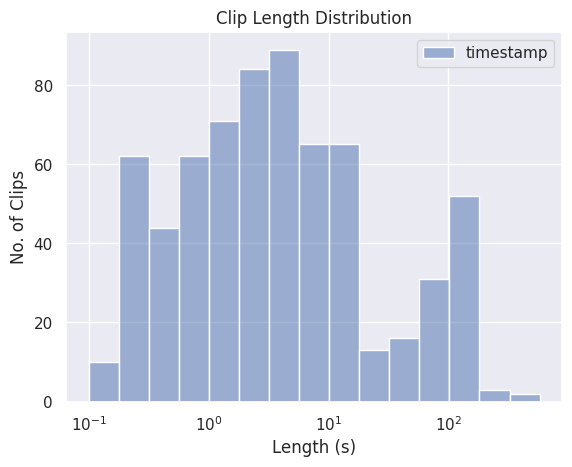

In [2]:
import seaborn as sns

sns.set_theme()

# Compute clip lengths for a single camera.
camera0 = metadata[metadata["camera"] == 0]
by_clip = camera0[["clip", "timestamp"]].groupby("clip")
clip_lengths = by_clip.max() - by_clip.min()
# Filter zero-length clips, since those are useless.
clip_lengths = clip_lengths[clip_lengths > 0]
clip_lengths.dropna(inplace=True)

plot = sns.histplot(data=clip_lengths, log_scale=True)
plot.set(title="Clip Length Distribution", xlabel="Length (s)", ylabel="No. of Clips")
clip_lengths

In [3]:
long_clips = clip_lengths[clip_lengths > 50]
long_metadata = metadata[metadata["clip"].isin(long_clips.index)]
long_metadata

clip 
 frame_num 
 camera 
 timestamp 
 file_id 
 
 
 
 
 0 
 0 
 250 
 0 
 3916.806634 
 clip0_cam0_frame250 
 
 
 1 
 0 
 250 
 1 
 3916.806634 
 clip0_cam1_frame250 
 
 
 2 
 0 
 250 
 2 
 3916.806634 
 clip0_cam2_frame250 
 
 
 3 
 0 
 255 
 0 
 3917.073184 
 clip0_cam0_frame255 
 
 
 4 
 0 
 255 
 1 
 3917.073184 
 clip0_cam1_frame255 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 430147 
 1246 
 2771 
 1 
 1075.325009 
 clip1246_cam1_frame2771 
 
 
 430148 
 1246 
 2771 
 2 
 1075.325009 
 clip1246_cam2_frame2771 
 
 
 430149 
 1246 
 2775 
 0 
 1075.491618 
 clip1246_cam0_frame2775 
 
 
 430150 
 1246 
 2775 
 1 
 1075.491618 
 clip1246_cam1_frame2775 
 
 
 430151 
 1246 
 2775 
 2 
 1075.491618 
 clip1246_cam2_frame2775 
 
 
 
 428487 rows × 5 columns

2023-01-17 10:38:10.548 | DEBUG    | src.self_supervised.pipelines.train_simclr.frame_selector:__filter_short_clips:79 - Have 381 clips of sufficient length.


('clip1030_cam0_frame3283', 'clip1030_cam1_frame3284', 'clip1030_cam2_frame3334')


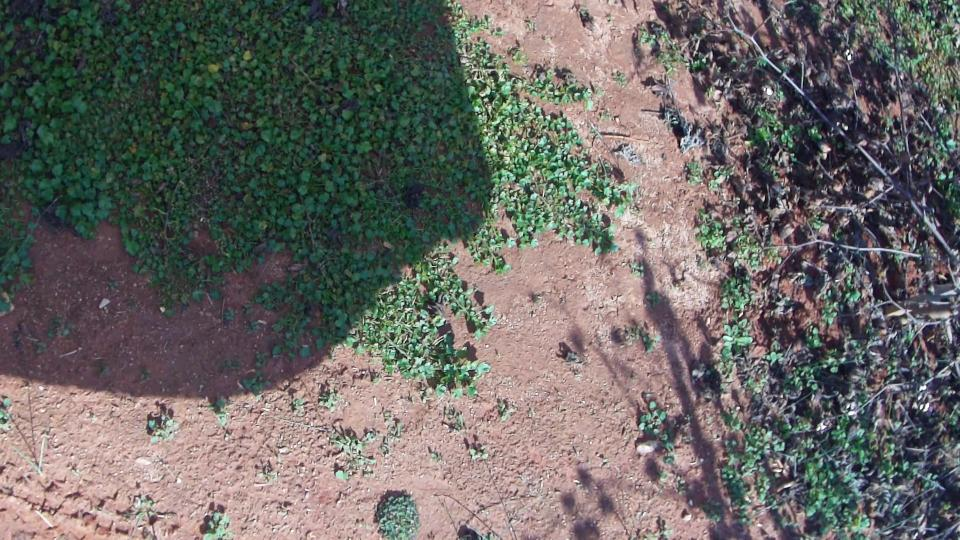

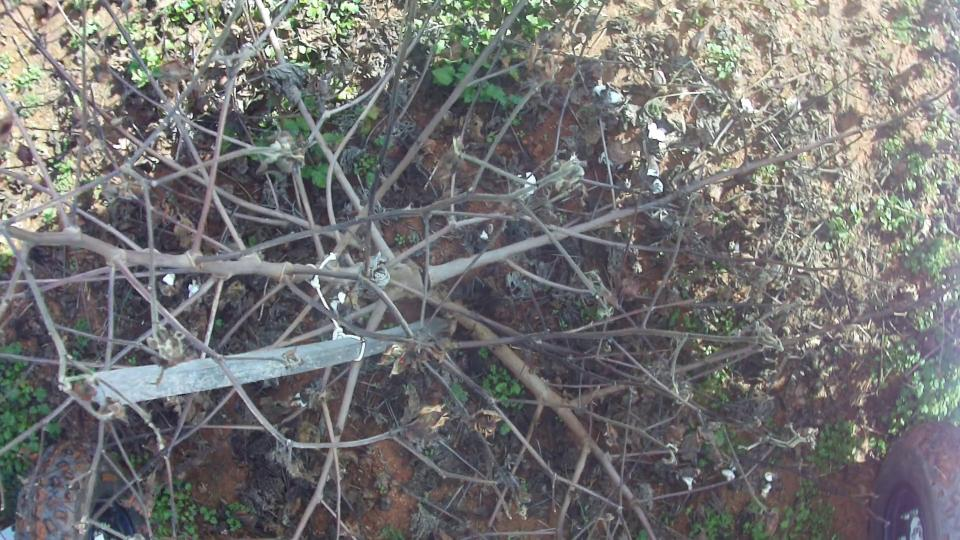

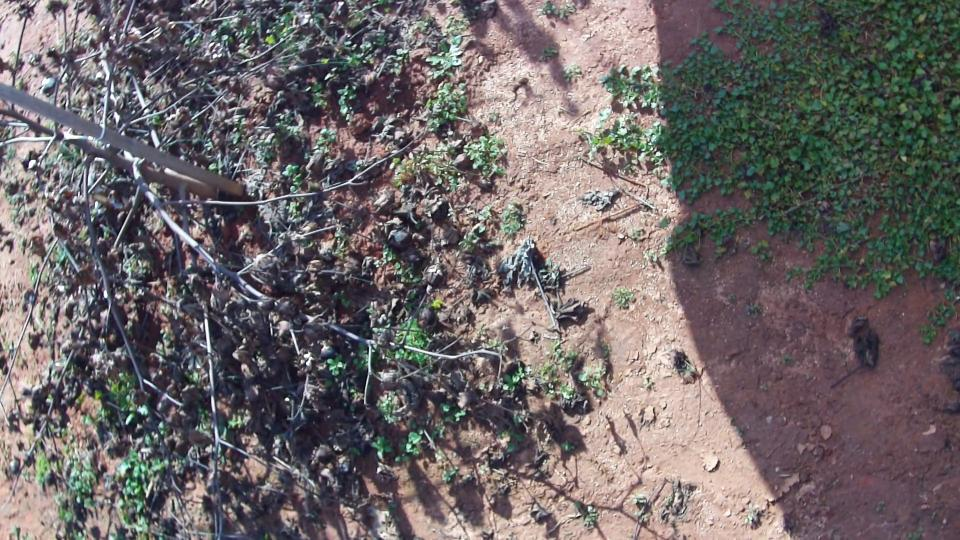

In [10]:
from src.self_supervised.pipelines.train_simclr.frame_selector import FrameSelector
from pathlib import Path
from PIL import Image

selector = FrameSelector(metadata)
example_ids = selector.select_example()
print(example_ids)

frame_path = Path("data/05_model_input/mars_multi_camera")
example_paths = [frame_path / f"{e}.jpg" for e in example_ids]
example_images = [Image.open(p) for p in example_paths]
for image in example_images:
    display(image)